In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv(r"C:\Users\geeth\Downloads\Summer_work\Predictive_maintenance\archive (1)\predictive_maintenance.csv")

#
Data Information

In [9]:
df.head(15)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [10]:
df.tail(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [12]:
df.shape

(10000, 10)

# 
Data cleaning- Validate the quality of the data

In [13]:
df['Product ID'].unique

<bound method Series.unique of 0       M14860
1       L47181
2       L47182
3       L47183
4       L47184
         ...  
9995    M24855
9996    H39410
9997    M24857
9998    H39412
9999    M24859
Name: Product ID, Length: 10000, dtype: object>

In [14]:
df['Product ID'].duplicated().value_counts()

False    10000
Name: Product ID, dtype: int64

In [15]:
df.drop_duplicates(subset='Product ID')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [16]:
df.isnull().sum().value_counts()

0    10
dtype: int64

#
Data visualization

array([[<Axes: title={'center': 'UDI'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

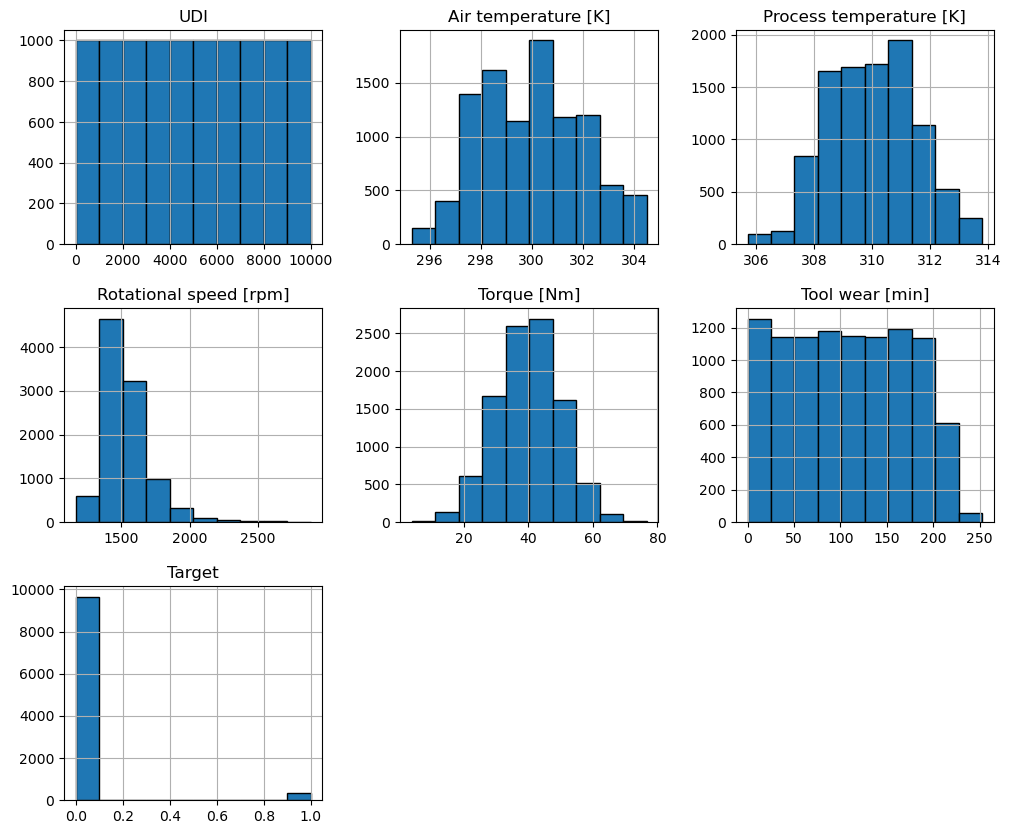

In [17]:
df.hist(figsize=(12, 10), bins=10, edgecolor='black')


In [18]:
total=df['Failure Type'].value_counts()

In [19]:
total

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [20]:
sns.set(style="whitegrid")

# Choose a color palette
colors = sns.color_palette("muted", len(total))


([<matplotlib.patches.Wedge at 0x2521d62ad40>,
 [Text(1.006950837828664, 0.4427753495805199, 'No Failure'),
  Text(-1.0369825054467996, -0.3669704121550925, 'Heat Dissipation Failure'),
  Text(-1.010942941553422, -0.4335831741699793, 'Power Failure'),
  Text(-0.9858967588475813, -0.4878602063028241, 'Overstrain Failure'),
  Text(-0.9663137913894254, -0.5255831585682652, 'Tool Wear Failure'),
  Text(-0.955722853045169, -0.544604285850931, 'Random Failures')],
 [Text(0.5492459115429076, 0.2415138270439199, '96.5%'),
  Text(-0.5656268211527997, -0.20016567935732316, '1.1%'),
  Text(-0.5514234226655028, -0.23649991318362507, '0.9%'),
  Text(-0.537761868462317, -0.2661055670742677, '0.8%'),
  Text(-0.5270802498487774, -0.2866817228554174, '0.4%'),
  Text(-0.5213033743882739, -0.2970568831914169, '0.2%')])

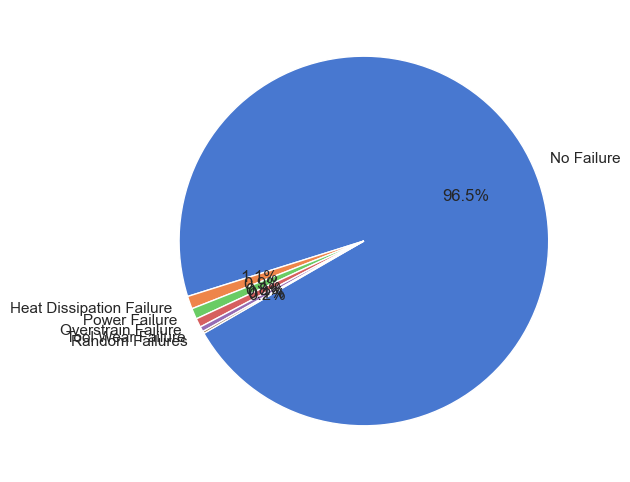

In [21]:
plt.figure(figsize=(6,6))
plt.pie(total, labels=total.index, autopct='%1.1f%%', startangle=210, colors=sns.color_palette("muted", len(total)))

In [22]:
total

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [23]:
target_group=df.groupby(['Target'])

In [24]:
print(target_group)

<Axes: xlabel='Target', ylabel='count'>

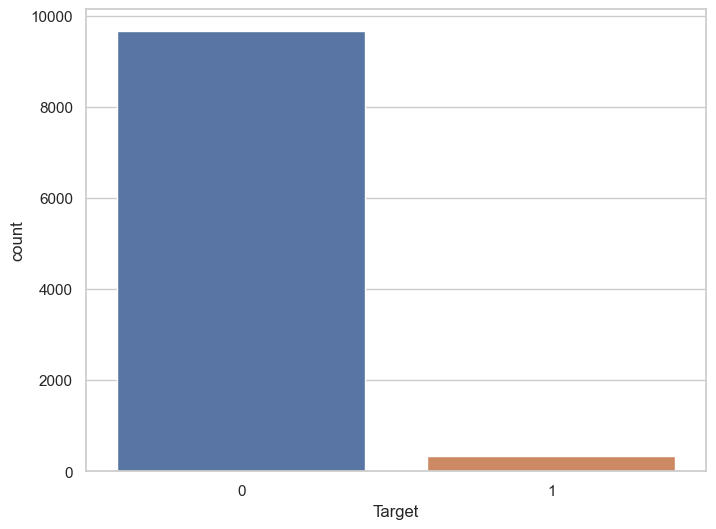

In [25]:
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Target')

#
coorealtion between features


In [26]:
coorelation_matrix=df.corr()

C:\Users\geeth\AppData\Local\Temp\ipykernel_8084\290174245.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coorelation_matrix=df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

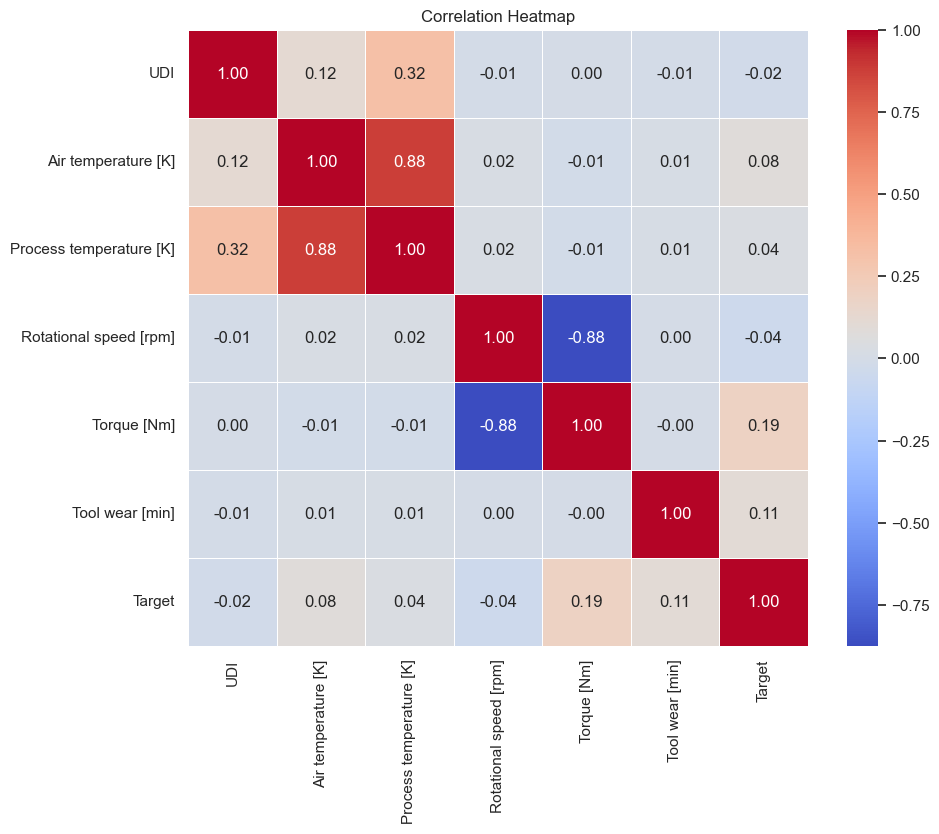

In [27]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(coorelation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

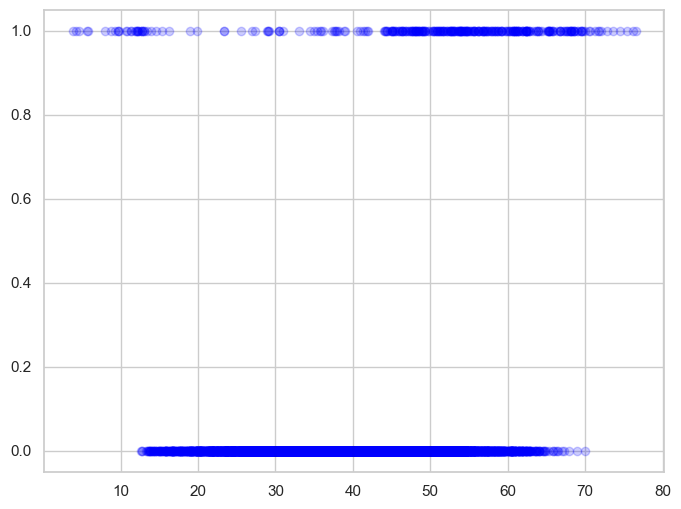

In [28]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Torque [Nm]'], df['Target'], color='blue', alpha=0.2)

<Axes: xlabel='Torque [Nm]', ylabel='Target'>

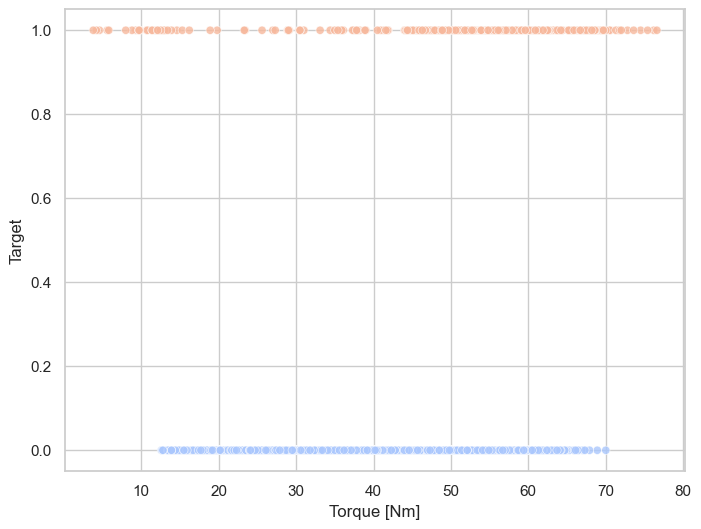

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['Torque [Nm]'], y=df['Target'], hue='Target', palette='coolwarm', alpha=0.8, legend=False)

In [30]:
Torque_failure=df.groupby('Torque [Nm]')['Target'].sum()

In [31]:
Torque

NameError: name 'Torque' is not defined

In [ ]:
# Plot the bar plot
plt.figure(figsize=(10, 6))
Torque_failure.plot(kind='bar', color='skyblue')

create a group of bins to split the huge distribution

In [ ]:
bins = [0, 10, 20, 30,40,50,60,70,80]
labels = ['0 10', '10-20','20-30','30-40','40-50','50-60','60-70','70-80']
df['Torque Range'] = pd.cut(df['Torque [Nm]'], bins=bins, labels=labels, right=False)


In [ ]:
Torque_failure=df.groupby('Torque Range')['Target'].sum()

In [ ]:
# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
Torque_failure.plot(kind='bar', color='lightgreen')

filter torque rows with only taget is 1

In [ ]:
failure_df = df[df['Target'] == 1]

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(failure_df['Torque [Nm]'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)

In [ ]:
df.info()

df.groupby('Type')where (df['Target']==1) it must be written as follows

In [ ]:
failure_groups=df[df['Target'] == 1].groupby('Type')

In [ ]:
len(df[df['Target'] == 1])

In [ ]:
# Plot the count of failure occurrences for each 'Type'
plt.figure(figsize=(8, 6))
sns.countplot(data=failure_df, x='Type', palette='Set2')

# convert the catagorical data to numerical

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.preprocessing import LabelEncoder

from collections import Counter
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [123]:
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
data = encoder.fit_transform(df)

In [124]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,1,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,2,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,2,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,2,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,2,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,1,298.8,308.4,1604,29.5,14,0,1
9996,9997,H39410,3,298.9,308.4,1632,31.8,17,0,1
9997,9998,M24857,1,299.0,308.6,1645,33.4,22,0,1
9998,9999,H39412,3,299.0,308.7,1408,48.5,25,0,1


In [125]:
data.loc[:,data.columns[-2]].unique()

array([0, 1], dtype=int64)

In [126]:
encode=LabelEncoder()
data.loc[:,data.columns[-1]]=encode.fit_transform(data.loc[:,data.columns[-1]])
encode.classes_

array([1, 2, 3, 4, 5, 6])

# TrainTest Split

In [135]:
X=data.drop(columns=['Failure Type','Target','UDI','Product ID'],axis=1)

In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int32  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
dtypes: float64(3), int32(1), int64(2)
memory usage: 429.8 KB


In [137]:
Y=data['Target'].values

In [138]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [140]:
X_train.info

<bound method DataFrame.info of       Type  Air temperature [K]  Process temperature [K]  \
9254     2                298.3                    309.1   
1561     2                298.2                    308.4   
1670     2                298.2                    307.8   
6087     1                300.9                    310.8   
6669     2                301.4                    310.5   
...    ...                  ...                      ...   
5734     2                302.3                    311.8   
5191     2                304.0                    313.2   
5390     3                302.8                    312.3   
860      3                296.1                    306.9   
7270     2                300.2                    310.4   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
9254                    1616         31.1              195  
1561                    1388         53.8              137  
1670                    1528         31.1              194  
608

In [141]:
Y_test.shape

(2000,)

# One-hot encoding


In [54]:
data = pd.get_dummies(data,drop_first=True)


In [55]:
data

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Product ID_H29425,...,Product ID_M24827,Product ID_M24835,Product ID_M24842,Product ID_M24846,Product ID_M24847,Product ID_M24849,Product ID_M24851,Product ID_M24855,Product ID_M24857,Product ID_M24859
0,1,1,298.1,308.6,1551,42.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,298.2,308.7,1408,46.3,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2,298.1,308.5,1498,49.4,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2,298.2,308.6,1433,39.5,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,298.2,308.7,1408,40.0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,298.8,308.4,1604,29.5,14,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9996,9997,3,298.9,308.4,1632,31.8,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9998,1,299.0,308.6,1645,33.4,22,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9998,9999,3,299.0,308.7,1408,48.5,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X_test.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Product ID_H29425,Product ID_H29432,...,Product ID_M24827,Product ID_M24835,Product ID_M24842,Product ID_M24846,Product ID_M24847,Product ID_M24849,Product ID_M24851,Product ID_M24855,Product ID_M24857,Product ID_M24859
6252,6253,2,300.8,310.3,1538,36.1,198,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4684,4685,1,303.6,311.8,1421,44.8,101,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1731,1732,1,298.3,307.9,1485,42.0,117,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4742,4743,2,303.3,311.3,1592,33.7,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4521,4522,2,302.4,310.4,1865,23.9,129,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Balancing Dataset

In [142]:
from imblearn.combine import SMOTETomek

In [143]:
smk=SMOTETomek(random_state=42)

In [144]:
X_train.values

array([[   2. ,  298.3,  309.1, 1616. ,   31.1,  195. ],
       [   2. ,  298.2,  308.4, 1388. ,   53.8,  137. ],
       [   2. ,  298.2,  307.8, 1528. ,   31.1,  194. ],
       ...,
       [   3. ,  302.8,  312.3, 1483. ,   47.2,  223. ],
       [   3. ,  296.1,  306.9, 1541. ,   32.6,   33. ],
       [   2. ,  300.2,  310.4, 1808. ,   25.8,   35. ]])

In [100]:
X_train.values

array([[9.255e+03, 2.000e+00, 2.983e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.562e+03, 2.000e+00, 2.982e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.671e+03, 2.000e+00, 2.982e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.391e+03, 3.000e+00, 3.028e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.610e+02, 3.000e+00, 2.961e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.271e+03, 2.000e+00, 3.002e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [145]:
Y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
X_train_res, y_train_res = smk.fit_resample(X_train.values, Y_train)

In [147]:
X_train_res.shape,y_train_res.shape

((15286, 6), (15286,))

# ModelTraining

Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
lg=LogisticRegression()

In [106]:
lg.fit(X_train_res, y_train_res)

C:\Users\geeth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
y_pred_lr=lg.predict(X_test)

C:\Users\geeth\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [158]:
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
precision_lr = precision_score(Y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(Y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(Y_test, y_pred_lr, average='weighted')

C:\Users\geeth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print()

Logistic Regression:
Accuracy: 0.3495
Precision: 0.9670076329180557
Recall: 0.3495
F1 Score: 0.5106883449475004



RandomFOrest

In [150]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [152]:
y_pred_rf = random_forest.predict(X_test)


C:\Users\geeth\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [153]:
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9675


In [154]:
# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test, y_pred_rf)
recall_rf = recall_score(Y_test, y_pred_rf)
f1_rf = f1_score(Y_test, y_pred_rf)

In [155]:
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print()

Random Forest:
Accuracy: 0.9675
Precision: 0.47674418604651164
Recall: 0.6721311475409836
F1 Score: 0.5578231292517006



In [160]:
X_test.shape

(2000, 6)

In [161]:
Y_test.shape

(2000,)

Gradient Boosting classifier

In [166]:
from sklearn.ensemble import GradientBoostingClassifier


gbm = GradientBoostingClassifier()


gbm.fit(X_train_res, y_train_res)


y_pred_gbm = gbm.predict(X_test)


C:\Users\geeth\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [168]:
accuracy_gbm = accuracy_score(Y_test, y_pred_gbm)
precision_gbm = precision_score(Y_test, y_pred_gbm)
recall_gbm = recall_score(Y_test, y_pred_gbm)
f1_gbm = f1_score(Y_test, y_pred_gbm)

In [169]:
print("GBM:")
print("Accuracy:", accuracy_gbm)
print("Precision:", precision_gbm)
print("Recall:", recall_gbm)
print("F1 Score:", f1_gbm)

GBM:
Accuracy: 0.9415
Precision: 0.32051282051282054
Recall: 0.819672131147541
F1 Score: 0.46082949308755766


In [170]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC()

# Train the model
svm.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

C:\Users\geeth\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


SVM Accuracy: 0.803


In [171]:
def improved_model_performance(model_name,model):
    F1_score = []
    model.fit(X_train,y_train)
    y_score = (model.predict_proba(X_test))[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_score)
    for t in thresholds:
        y_pred = np.where(y_score>t,1,0)
        F1_score.append(f1_score(y_test,y_pred))
    best_threshold = thresholds[np.argmax(F1_score)]
    Improved_f1_score = np.max(F1_score)
    print(f'best_f1_score is : ', np.max(F1_score))
    print(f'best_threshold is : ',best_threshold)
    y_pred_best = np.where(y_score>best_threshold,1,0)
    cm = confusion_matrix(y_test,y_pred_best)
    disp = ConfusionMatrixDisplay(cm,display_labels = model.classes_)
    disp.plot()
    plt.show()
    dict =  {'Model Name' : [model_name],
            'best_threshold' : [best_threshold],
            'Improved_f1_score' : [Improved_f1_score]}
    return pd.DataFrame(dict)